<a href="https://colab.research.google.com/github/Rishu-N/COMPUTER-VISION/blob/main/DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from zipfile import ZipFile

# specifying the zip file name
file_name = "/content/drive/MyDrive/PYTHON/archive.zip"

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()

    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

Streaming output truncated to the last 5000 lines.
archive/train/labels/road558_png.rf.d3997453e5619ebaadb3263d1f3e6433.txt 2023-12-07 20:04:10           79
__MACOSX/archive/train/labels/._road558_png.rf.d3997453e5619ebaadb3263d1f3e6433.txt 2023-12-07 20:04:10          212
archive/train/labels/FisheyeCamera_1_00635_png.rf.0393df5455254965dd22036c828bbb82.txt 2023-12-07 20:04:10           82
__MACOSX/archive/train/labels/._FisheyeCamera_1_00635_png.rf.0393df5455254965dd22036c828bbb82.txt 2023-12-07 20:04:10          212
archive/train/labels/001698_JPG_jpg.rf.fda0da53b098630ec023101df046bf91.txt 2023-12-07 20:04:10           80
__MACOSX/archive/train/labels/._001698_JPG_jpg.rf.fda0da53b098630ec023101df046bf91.txt 2023-12-07 20:04:10          212
archive/train/labels/000374_jpg.rf.09f0efa1a25ecc107c012105e759c92a.txt 2023-12-07 20:04:08           80
__MACOSX/archive/train/labels/._000374_jpg.rf.09f0efa1a25ecc107c012105e759c92a.txt 2023-12-07 20:04:08          212
archive/train/labels/0000

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 752.1/752.1 kB 11.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

## IMPORTING LIBRARIES

In [4]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
import torch
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

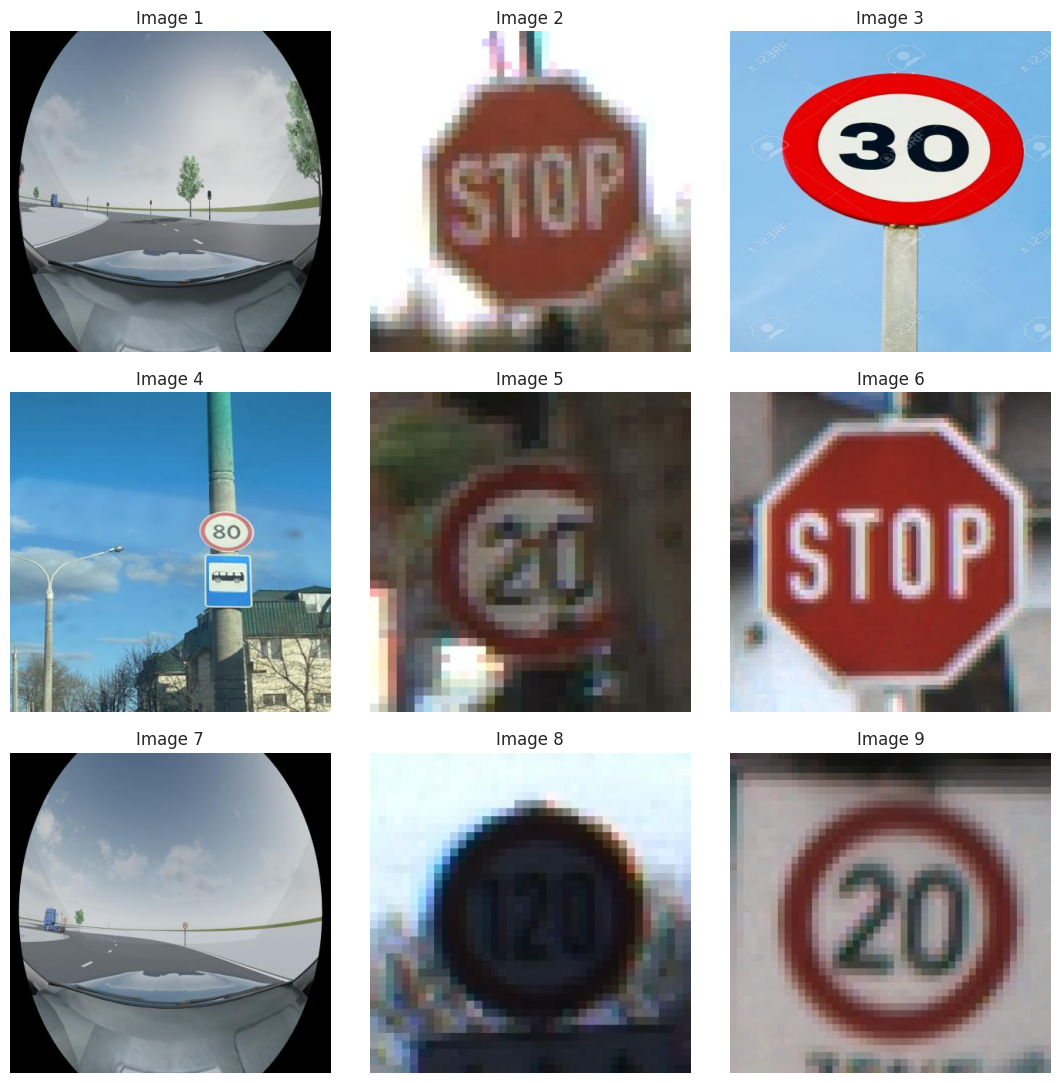

In [5]:
Image_dir = '/content/archive/train/images'

sample = 9
image_files = os.listdir(Image_dir)

import random

# Ensure image_files is not empty
if not image_files:
    print("Error: image_files is empty.")
else:
    # Determine the maximum number of samples that can be drawn
    max_samples = min(len(image_files), sample)

    # Ensure sample is non-negative and not greater than the population size
    if sample < 0:
        print("Error: Sample size cannot be negative.")
    elif sample > len(image_files):
        print("Error: Sample size is larger than the population size.")
    else:
        # Randomly select num_samples images
        rand_image = random.sample(image_files, max_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(sample):
    image = rand_image[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

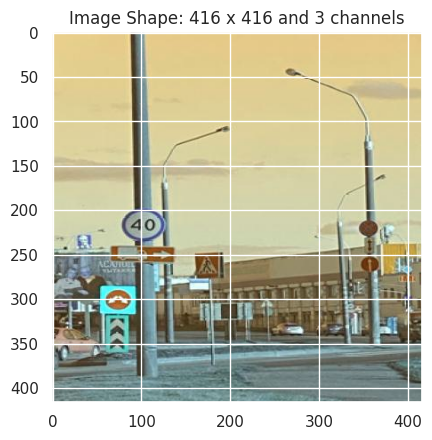

In [6]:
image = cv2.imread('/content/archive/train/images/road781_png.rf.eb64c78000a704daa7e5b88e8f835873.jpg')
h, w, c = image.shape
plt.imshow(image)
plt.title(f"Image Shape: {w} x {h} and 3 channels")
plt.show()

## PRETRAINED YOLO MODEL

In [7]:
model = YOLO("yolov8n.pt")
image = '/content/archive/train/images/road781_png.rf.eb64c78000a704daa7e5b88e8f835873.jpg'
predict = model.predict(image,imgsz=(416))

100%|██████████| 6.23M/6.23M [00:00<00:00, 170MB/s]



image 1/1 /content/archive/train/images/road781_png.rf.eb64c78000a704daa7e5b88e8f835873.jpg: 416x416 3 cars, 10.1ms
Speed: 4.5ms preprocess, 10.1ms inference, 3057.8ms postprocess per image at shape (1, 3, 416, 416)


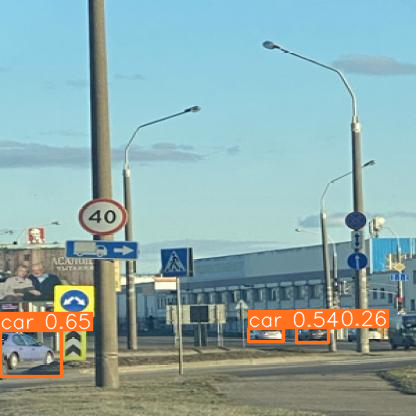

In [8]:
plot = predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

## FINAL MODEL TRAINING

In [9]:
fn_model = YOLO('yolov8.yaml').load('yolov8n.pt')
result_fn = fn_model.train(data='/content/archive/data.yaml',epochs=30,
                 imgsz = 416, batch = 80 ,lr0=0.0001, dropout= 0.15, device = 0)

WARNING ⚠️ no model scale passed. Assuming scale='n'.
Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.2.4 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8.yaml, data=/content/archive/data.yaml, epochs=30, time=None, patience=100, batch=80, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_f

100%|██████████| 755k/755k [00:00<00:00, 41.0MB/s]


Overriding model.yaml nc=80 with nc=15
WARNING ⚠️ no model scale passed. Assuming scale='n'.

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]      

train: Scanning /content/archive/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:07<00:00, 499.50it/s]


train: New cache created: /content/archive/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/archive/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 414.29it/s]


val: New cache created: /content/archive/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000625), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      5.28G     0.8705      3.578      1.112         25        416: 100%|██████████| 45/45 [00:48<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.08s/it]

                   all        801        944     0.0533      0.727      0.111     0.0974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.82G     0.7246      2.365      1.016         26        416: 100%|██████████| 45/45 [00:36<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]

                   all        801        944      0.377      0.341      0.251      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.83G      0.725      2.011      1.008         26        416: 100%|██████████| 45/45 [00:37<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]


                   all        801        944      0.288      0.519      0.343      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.83G     0.7118      1.784     0.9955         17        416: 100%|██████████| 45/45 [00:34<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.03s/it]

                   all        801        944      0.461      0.479      0.484      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.81G     0.6792      1.524     0.9778         19        416: 100%|██████████| 45/45 [00:33<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.15s/it]

                   all        801        944      0.683      0.597      0.655      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.84G      0.644       1.36     0.9654         28        416: 100%|██████████| 45/45 [00:32<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.16s/it]

                   all        801        944      0.748      0.635      0.701      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.83G     0.6402       1.26     0.9636         15        416: 100%|██████████| 45/45 [00:33<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.08s/it]

                   all        801        944      0.684      0.648      0.717      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.85G     0.6247      1.159     0.9549         20        416: 100%|██████████| 45/45 [00:33<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.03s/it]


                   all        801        944       0.75      0.691      0.744      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.84G     0.6156      1.082     0.9481         14        416: 100%|██████████| 45/45 [00:33<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.04it/s]

                   all        801        944      0.834       0.71      0.802      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.84G     0.6027      0.995     0.9422         22        416: 100%|██████████| 45/45 [00:33<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]

                   all        801        944      0.859      0.768      0.839      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.84G     0.6003      0.967     0.9479         24        416: 100%|██████████| 45/45 [00:34<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.09it/s]

                   all        801        944      0.907      0.756      0.846      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.83G      0.588     0.9192     0.9417         16        416: 100%|██████████| 45/45 [00:35<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        801        944      0.857      0.758      0.851      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.84G     0.5935     0.8842     0.9409         19        416: 100%|██████████| 45/45 [00:35<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.08it/s]

                   all        801        944      0.882      0.799      0.873      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.83G     0.5743     0.8312     0.9341         19        416: 100%|██████████| 45/45 [00:34<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.02it/s]

                   all        801        944      0.913       0.79      0.871      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.84G     0.5688     0.8221     0.9322         25        416: 100%|██████████| 45/45 [00:33<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.12s/it]


                   all        801        944      0.909      0.821      0.882      0.759

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.84G     0.5629      0.785     0.9291         24        416: 100%|██████████| 45/45 [00:33<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.11s/it]

                   all        801        944      0.921      0.771      0.873      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.84G     0.5658     0.7748     0.9315         16        416: 100%|██████████| 45/45 [00:33<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.17s/it]

                   all        801        944      0.929      0.809      0.885      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.83G     0.5567     0.7668     0.9258         24        416: 100%|██████████| 45/45 [00:33<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.09s/it]

                   all        801        944      0.918      0.817      0.891      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.84G     0.5433      0.743     0.9234         19        416: 100%|██████████| 45/45 [00:33<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.04it/s]


                   all        801        944      0.896      0.841      0.896      0.777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.83G     0.5417     0.7042     0.9222         25        416: 100%|██████████| 45/45 [00:33<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.20it/s]

                   all        801        944      0.949      0.825      0.904      0.783


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.81G     0.5388     0.5332     0.8709         12        416: 100%|██████████| 45/45 [00:36<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        801        944      0.943      0.835      0.903      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.83G     0.5323     0.5103     0.8753         18        416: 100%|██████████| 45/45 [00:32<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.20it/s]

                   all        801        944      0.947      0.829      0.905      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.81G      0.516     0.4716     0.8716         11        416: 100%|██████████| 45/45 [00:30<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.12s/it]

                   all        801        944      0.921      0.855      0.913      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.83G     0.5133     0.4491     0.8686         10        416: 100%|██████████| 45/45 [00:31<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.00s/it]


                   all        801        944      0.919       0.86      0.914       0.79

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.84G     0.4986     0.4336     0.8708         12        416: 100%|██████████| 45/45 [00:31<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        801        944      0.954      0.858      0.919      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.84G     0.4924     0.4224     0.8571         10        416: 100%|██████████| 45/45 [00:32<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.02it/s]

                   all        801        944      0.946      0.856      0.923      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      4.83G     0.4945     0.4015     0.8546         12        416: 100%|██████████| 45/45 [00:31<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.07s/it]

                   all        801        944      0.932      0.881      0.922      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.81G     0.4767     0.3892       0.86         10        416: 100%|██████████| 45/45 [00:31<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        801        944      0.954      0.867      0.922      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.83G     0.4764     0.3762     0.8521         12        416: 100%|██████████| 45/45 [00:32<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.10it/s]

                   all        801        944      0.935      0.881      0.928      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.81G     0.4695     0.3737     0.8512         12        416: 100%|██████████| 45/45 [00:31<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.09s/it]

                   all        801        944      0.952       0.87      0.926      0.812



30 epochs completed in 0.346 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.4 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8 summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]


                   all        801        944      0.949      0.874      0.926      0.812
           Green Light        801        122      0.865      0.607      0.743      0.426
             Red Light        801        108      0.839       0.63      0.714      0.448
       Speed Limit 100        801         52      0.952      0.942      0.977      0.899
       Speed Limit 110        801         17      0.943      0.971      0.992      0.918
       Speed Limit 120        801         60      0.983      0.983      0.995      0.915
        Speed Limit 20        801         56          1      0.908      0.981      0.865
        Speed Limit 30        801         74      0.955      0.959       0.98      0.919
        Speed Limit 40        801         55       0.98      0.905      0.986      0.884
        Speed Limit 50        801         71      0.984      0.857      0.951       0.85
        Speed Limit 60        801         76      0.943      0.908      0.946      0.868
        Speed Limit 7

## METRICS EVALUATION and VISULAIZATION

In [10]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

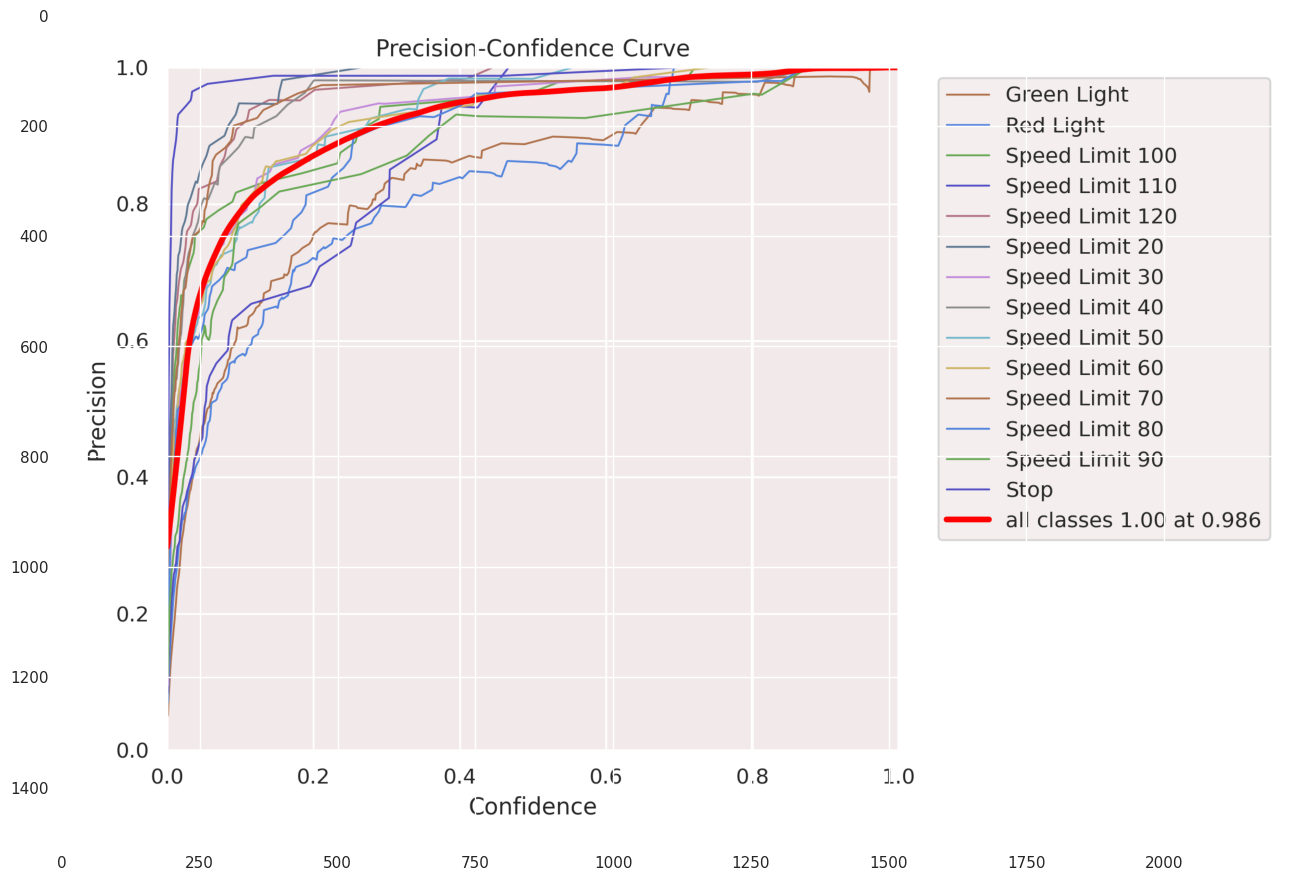

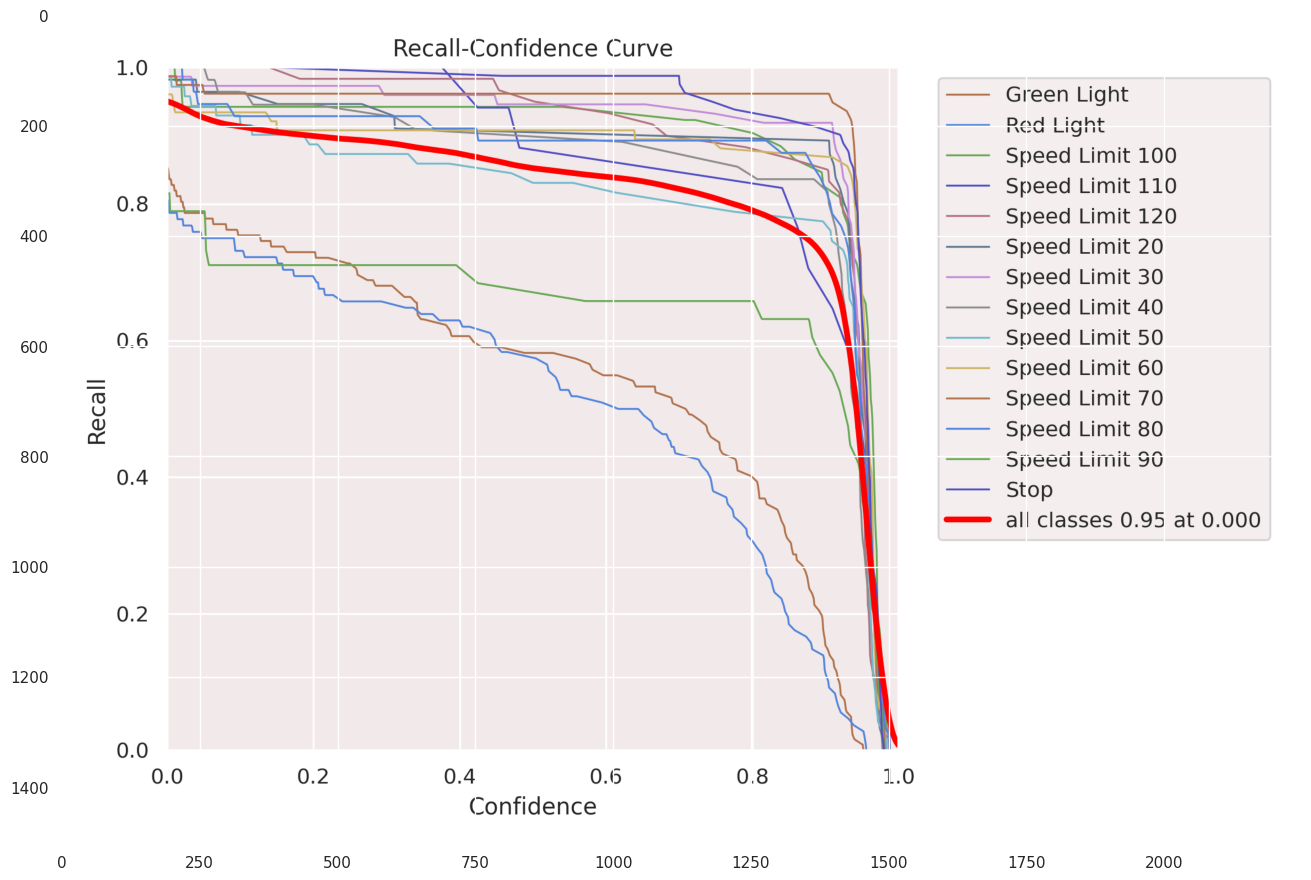

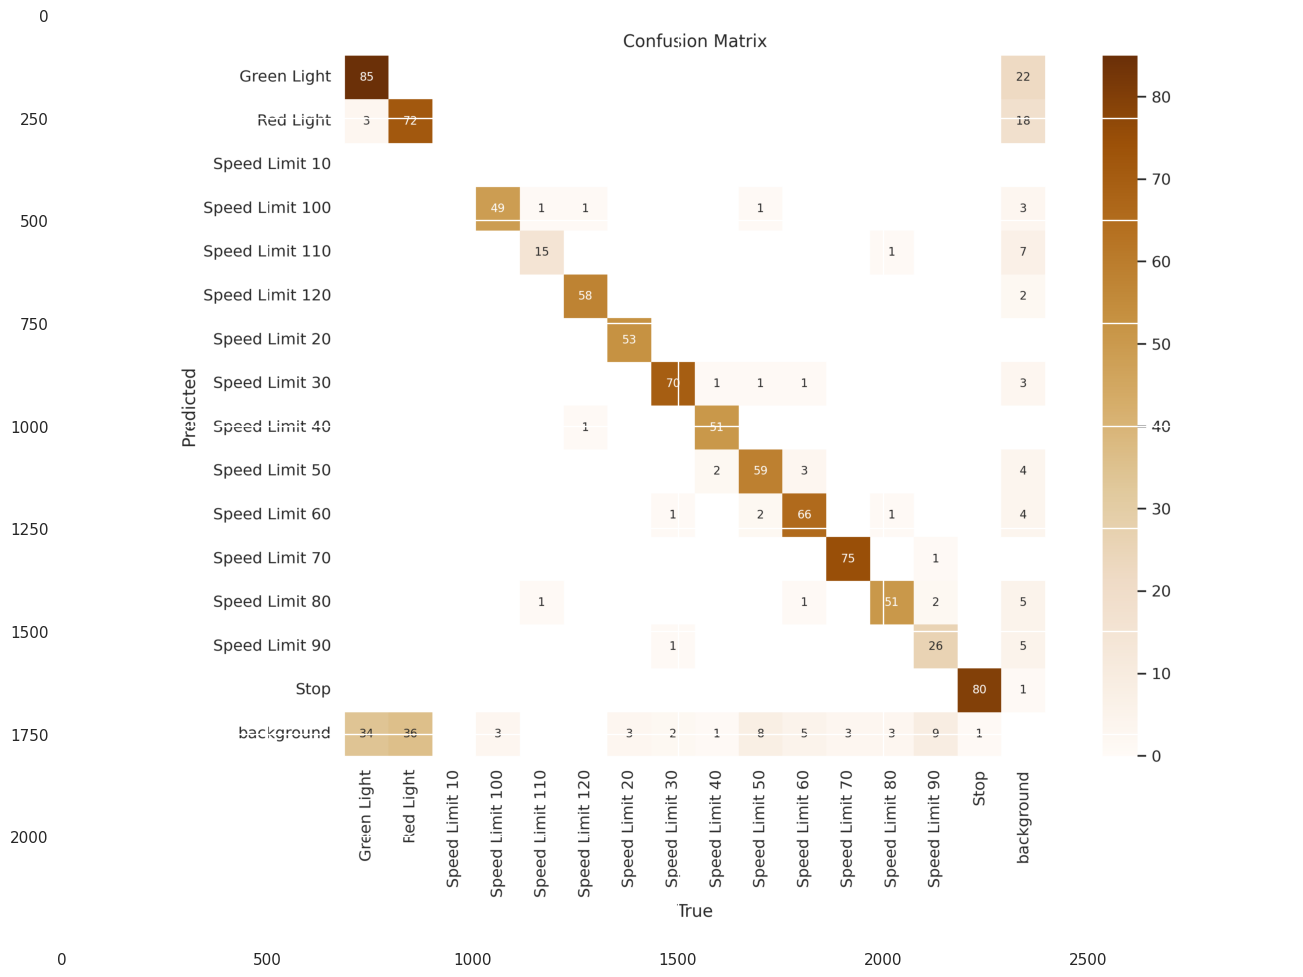

In [11]:
for i in list_of_metrics:

    image = cv2.imread(f'/content/runs/detect/train/{i}')
    plt.figure(figsize=(16, 12))
    plt.imshow(image)
    plt.show()

## RESULTS

In [12]:
Result = pd.read_csv('/content/runs/detect/train/results.csv')
Result.head(5)

epoch           train/box_loss           train/cls_loss  \
0                        1                  0.87052                   3.5777   
1                        2                  0.72458                   2.3651   
2                        3                  0.72501                   2.0107   
3                        4                  0.71182                   1.7841   
4                        5                  0.67921                   1.5243   

            train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
0                  1.11210                  0.05326                  0.72685   
1                  1.01590                  0.37706                  0.34140   
2                  1.00850                  0.28846                  0.51917   
3                  0.99547                  0.46097                  0.47908   
4                  0.97782                  0.68304                  0.59684   

          metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
0                  0.11057                  0.09743                  0.65277   
1                  0.25082                  0.21202                  0.63670   
2                  0.34339                  0.28448                  0.70715   
3                  0.48355                  0.39283                  0.70737   
4                  0.65477                  0.55332                  0.61795   

              val/cls_loss             val/dfl_loss                   lr/pg0  \
0                   3.2148                  0.91683                 0.000171   
1                   2.4031                  0.93315                 0.000335   
2                   2.1258                  0.95993                 0.000488   
3                   1.8862                  0.94855                 0.000474   
4                   1.6251                  0.92597                 0.000457   

                    lr/pg1                   lr/pg2  
0                 0.000171                 0.000171  
1                 0.000335                 0.000335  
2                 0.000488                 0.000488  
3                 0.000474                 0.000474  
4                 0.000457                 0.000457

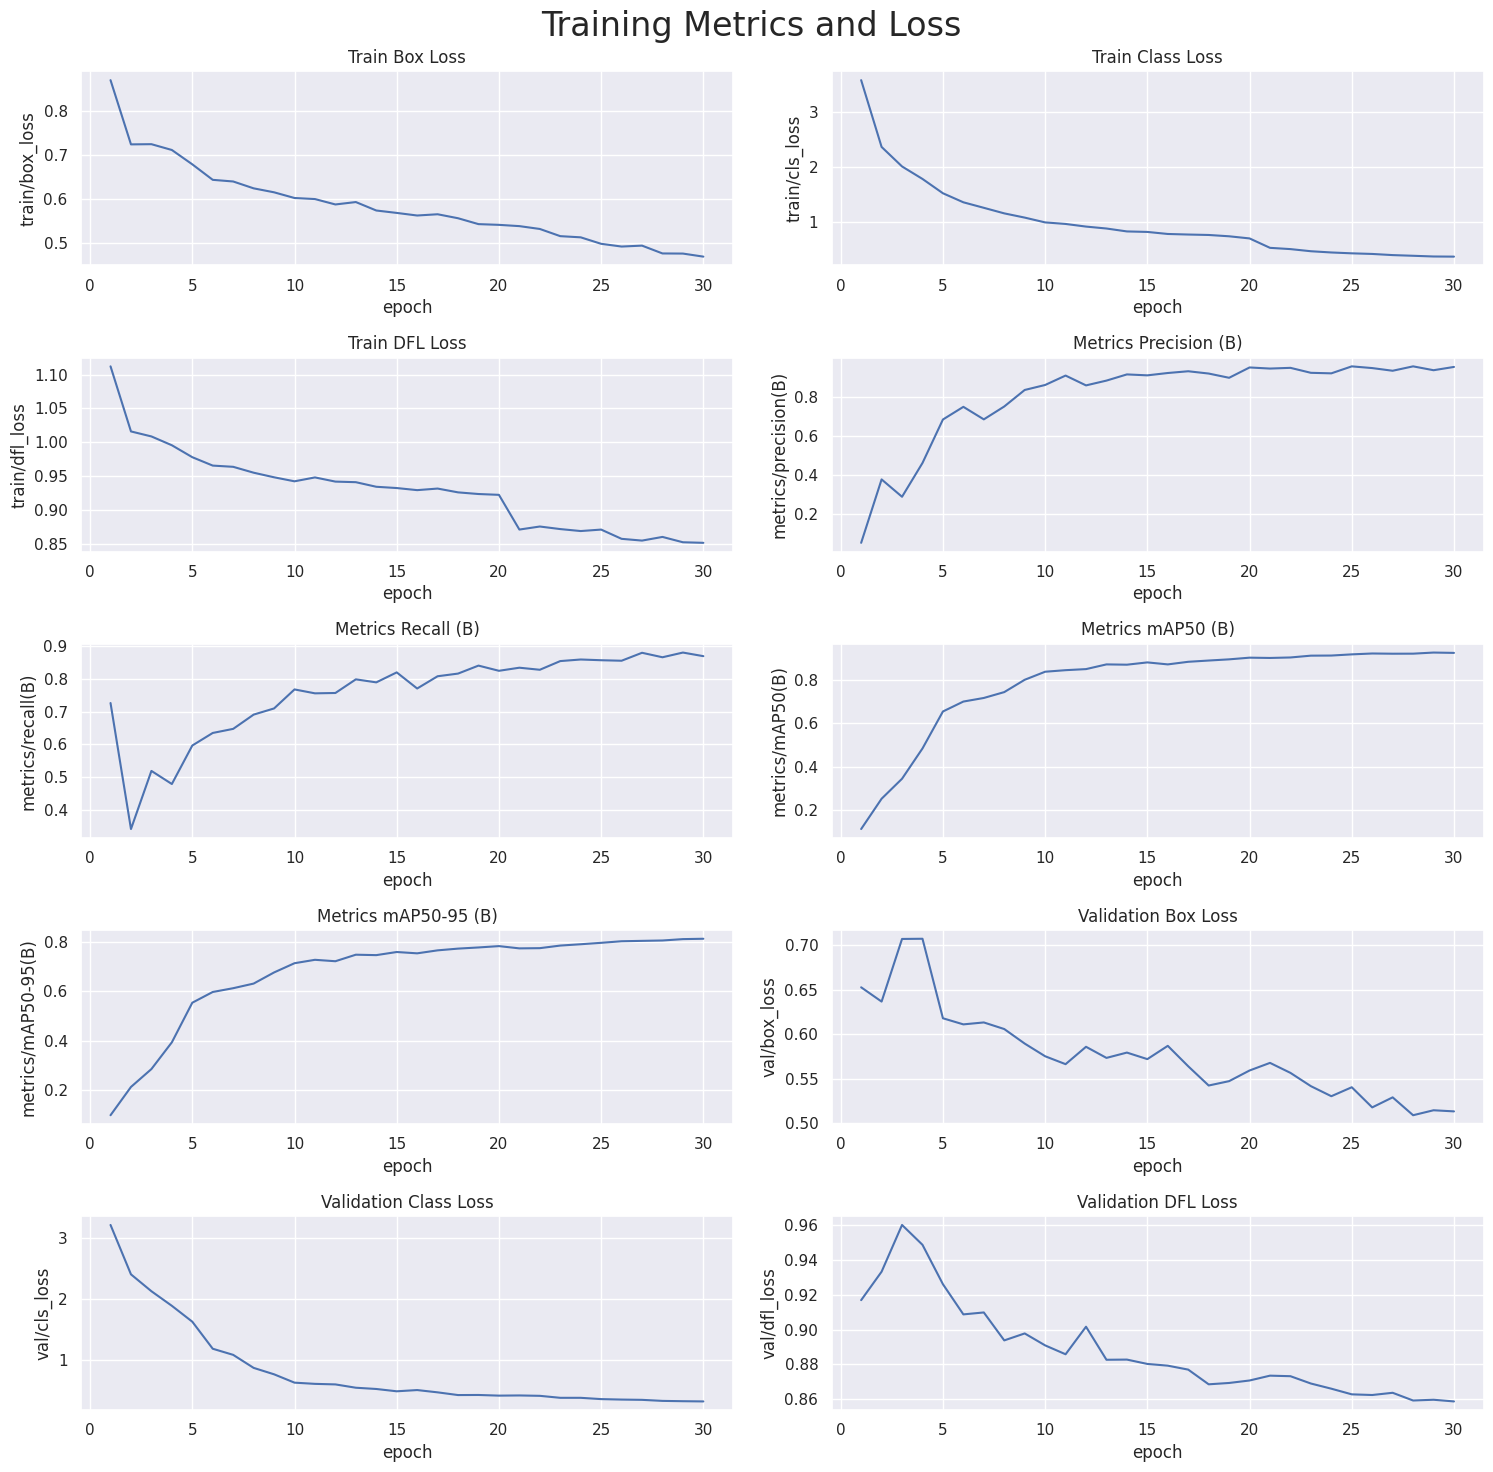

In [13]:
df = Result.copy(deep=True)

df.columns = Result.columns.str.strip()

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

## TEST DATA

In [14]:
Valid_model  = YOLO('/content/runs/detect/train/weights/best.pt')
metric = Valid_model.val(split = 'test')

Ultralytics YOLOv8.2.4 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8 summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/archive/test/labels... 638 images, 1 backgrounds, 0 corrupt: 100%|██████████| 638/638 [00:01<00:00, 602.06it/s]

val: New cache created: /content/archive/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.00it/s]


                   all        638        770      0.895      0.809      0.892      0.769
           Green Light        638        110      0.914      0.679      0.837      0.501
             Red Light        638         94      0.783      0.614      0.685      0.423
        Speed Limit 10        638          3      0.713      0.333      0.654      0.514
       Speed Limit 100        638         46       0.86      0.935      0.961      0.852
       Speed Limit 110        638         21       0.93      0.762       0.83      0.754
       Speed Limit 120        638         44       0.88      0.955      0.976      0.887
        Speed Limit 20        638         46      0.977      0.911      0.972      0.882
        Speed Limit 30        638         60      0.908      0.817      0.896      0.826
        Speed Limit 40        638         53       0.97      0.962      0.978      0.868
        Speed Limit 50        638         50      0.829      0.778       0.88      0.799
        Speed Limit 6

In [ ]:
# final results of test data

precision = round(metric.results_dict["metrics/precision(B)"] * 100, 2)
recall = round(metric.results_dict["metrics/recall(B)"] * 100, 2)
mAP50 = round(metric.results_dict["metrics/mAP50(B)"] * 100, 2)
mAP50_95 = round(metric.results_dict["metrics/mAP50-95(B)"] * 100, 2)

In [16]:
table = [["Precision", precision],
         ["Recall", recall],
         ["mAP50", mAP50],
         ["mAP50-95", mAP50_95]]

# Printing the table
print('\033[1mMetrics of Test Data:\033[0m \n',tabulate(table, headers=["Metric", "Value"]))

Metrics of Test Data: 
 Metric       Value
---------  -------
Precision    89.5
Recall       80.88
mAP50        89.18
mAP50-95     76.86


## VALIDATING THE MODEL WITH VALIDATION DATA

In [17]:
image_dir = '/content/archive/valid/images'

# Get a list of all image files in the directory
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir)]

random_image = random.sample(image_files,16)

In [18]:
for img in random_image:
    image = cv2.imread(img)
    results = fn_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)


0: 416x416 1 Speed Limit 120, 8.9ms
Speed: 0.9ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train2

0: 416x416 1 Speed Limit 80, 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train3

0: 416x416 1 Speed Limit 120, 10.6ms
Speed: 1.2ms preprocess, 10.6ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train4

0: 416x416 1 Speed Limit 30, 11.4ms
Speed: 0.9ms preprocess, 11.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train5

0: 416x416 1 Speed Limit 120, 11.9ms
Speed: 1.0ms preprocess, 11.9ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train6

0: 416x416 1 Stop, 11.1ms
Speed: 1.4ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/det

## PLOTTING RESULTS

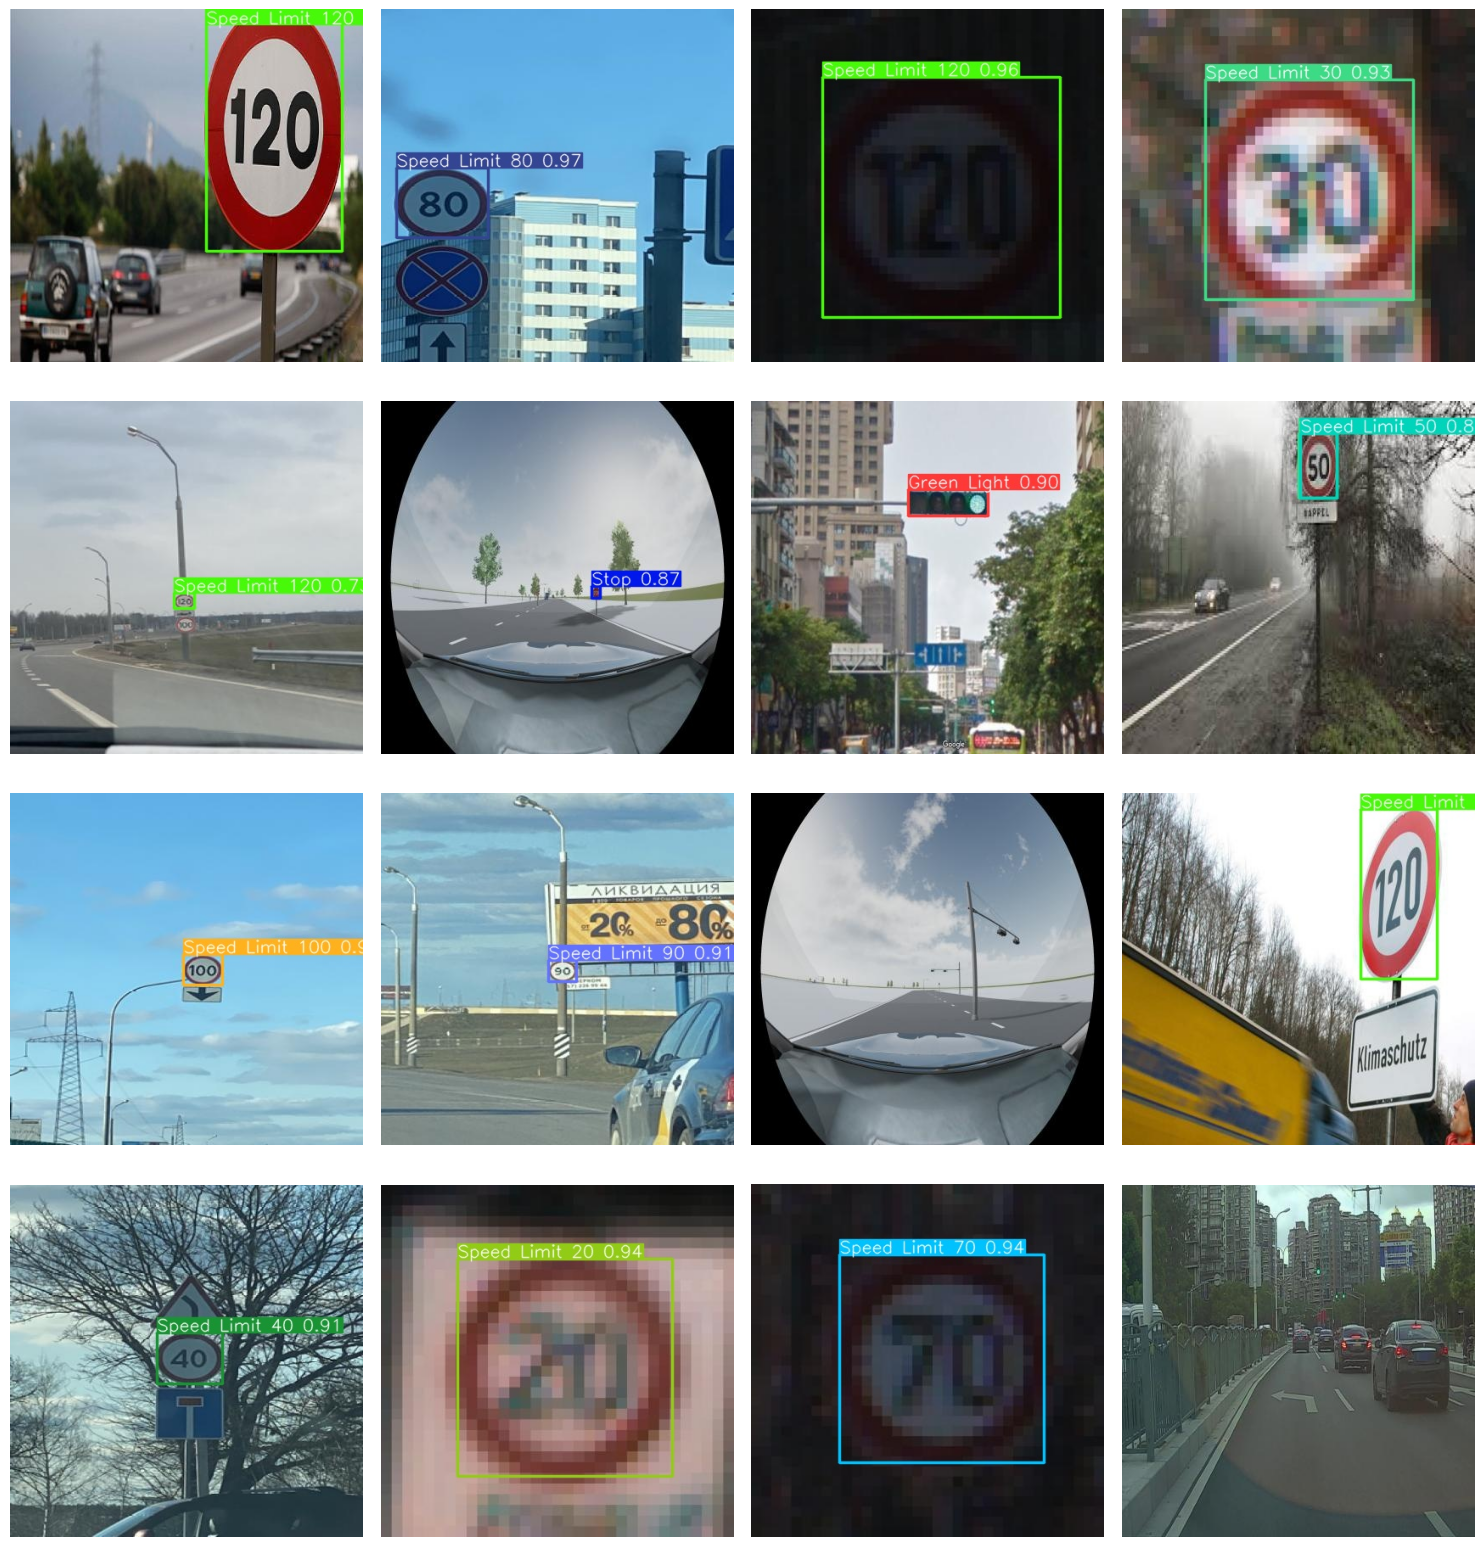

In [21]:
num_images = len(random_image)
num_cols = 4
num_rows = (num_images + num_cols - 1) // num_cols  # Calculate the number of rows needed

plt.figure(figsize=(15, 4 * num_rows))  # Adjust the figure size according to the number of rows

for i in range(2, 18):
    plt.subplot(num_rows, num_cols, i-1)
    plt.imshow(plt.imread(f"/content/runs/detect/train{i}/image0.jpg"))
    plt.axis('off')
plt.tight_layout()
plt.show()